In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

In [ ]:
#unzip the dataset, be sure to add the dataset to the colab environment first
!tar -xvf /content/genki4k.tar

In [54]:
images_dir = "/content/files"
labels_file = "/content/labels.txt"

labels = []

# Read and extract labels from the text file
with open(labels_file, 'r') as f:
    for line in f:
        parts = line.strip().split(" ")  # Split the line by comma
        label = parts[0].strip()  # Extract the first part (the label)
        labels.append(label)

# Now, 'labels' contains the extracted labels
#print(labels)

# Initialize empty lists to store images and labels
images_data = []


# Loop through the image files in the "images" directory
for image in sorted(os.listdir(images_dir)):
        image_file = os.path.join(images_dir, image)
        # Load and preprocess each image


        img = cv2.imread(image_file)
        img = cv2.resize(img, (64, 64))  # Resize the image to your desired size
        img = img.astype(np.float32) / 255.0  # Normalize pixel values to the range [0, 1]
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Append the image and its corresponding label to the lists
        images_data.append(img)


# Convert lists to NumPy arrays
images_data = np.array(images_data).astype('float32')

labels= np.array(labels).astype('float32')

# Convert labels to one-hot encoding (if needed, not for binary classification)
#labels = to_categorical(labels, num_classes=2)
# train_test split
X_train, X_val, y_train, y_val = train_test_split(images_data, labels, test_size=0.2, shuffle=True)

In [ ]:
# Model construction
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-4)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_58 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 16, 16, 32)      

# Base Model

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data= (X_val, y_val))

Epoch 1/50
100/100 [==============================] - 43s 12ms/step - loss: 0.6859 - accuracy: 0.5534 - val_loss: 0.6806 - val_accuracy: 0.5525
Epoch 2/50
100/100 [==============================] - 1s 7ms/step - loss: 0.6758 - accuracy: 0.5856 - val_loss: 0.6743 - val_accuracy: 0.5838
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 0.6689 - accuracy: 0.5881 - val_loss: 0.6694 - val_accuracy: 0.5913
Epoch 4/50
100/100 [==============================] - 1s 7ms/step - loss: 0.6610 - accuracy: 0.5984 - val_loss: 0.6639 - val_accuracy: 0.6050
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 0.6529 - accuracy: 0.6141 - val_loss: 0.6631 - val_accuracy: 0.6237
Epoch 6/50
100/100 [==============================] - 1s 7ms/step - loss: 0.6421 - accuracy: 0.6372 - val_loss: 0.6485 - val_accuracy: 0.6187
Epoch 7/50
100/100 [==============================] - 1s 7ms/step - loss: 0.6311 - accuracy: 0.6403 - val_loss: 0.6419 - val_accuracy: 0.6438
Epoc

In [ ]:
# make predictions, same as model.evaluate() but allows to change the threshold if needed
preds  = model.predict(X_val)
pred_labels=[]

for pred in preds:
  if pred > 0.5:
    pred_labels.append(1)
  else:
    pred_labels.append(0)

print(np.sum(pred_labels == y_val)/len(pred_labels))

25/25 [==============================] - 0s 3ms/step
0.75625


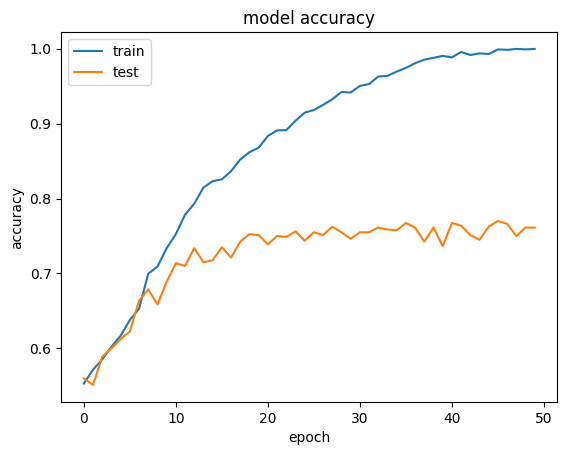

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()


plot_hist(history)

<Axes: >

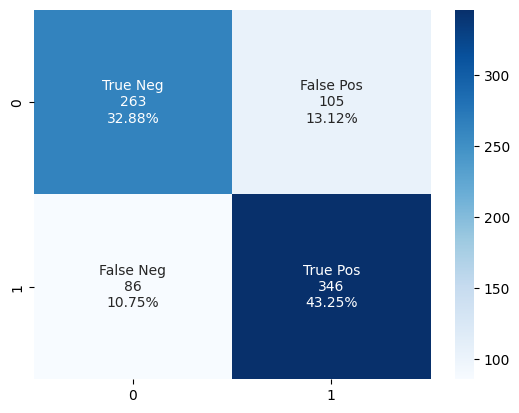

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(
    y_val,
    pred_labels
)

import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
model.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing with Data Augmentation

In [55]:
# Clean output and restart the kernel if you like
tf.random.set_seed(1234)

flipped = tf.image.flip_left_right(X_train)

brighted= tf.image.random_brightness(
    X_train, 0.1, False)

flipped_brighted= tf.image.flip_left_right(brighted)

X_train_1= tf.concat([X_train, flipped], axis=0)
X_train_2= tf.concat([X_train_1, brighted], axis=0)
X_train = tf.concat([X_train_2, flipped_brighted], axis=0)

y_train_1 = tf.concat([y_train, y_train], axis=0)
y_train_2 = tf.concat([y_train_1, y_train], axis=0)
y_train = tf.concat([y_train_2, y_train], axis=0)

print(y_train.shape) #sanity check




(12800,)


# Models with Augmentation

In [ ]:
# Model construction
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-4)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_82 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_83 (Conv2D)          (None, 16, 16, 32)      

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data= (X_val, y_val), batch_size=32)

Epoch 1/50
400/400 [==============================] - 6s 8ms/step - loss: 0.6772 - accuracy: 0.5700 - val_loss: 0.6712 - val_accuracy: 0.5850
Epoch 2/50
400/400 [==============================] - 2s 6ms/step - loss: 0.6494 - accuracy: 0.6276 - val_loss: 0.6588 - val_accuracy: 0.5938
Epoch 3/50
400/400 [==============================] - 2s 6ms/step - loss: 0.5980 - accuracy: 0.6804 - val_loss: 0.6135 - val_accuracy: 0.6787
Epoch 4/50
400/400 [==============================] - 2s 6ms/step - loss: 0.5092 - accuracy: 0.7522 - val_loss: 0.5066 - val_accuracy: 0.7588
Epoch 5/50
400/400 [==============================] - 2s 6ms/step - loss: 0.4286 - accuracy: 0.8061 - val_loss: 0.4500 - val_accuracy: 0.7912
Epoch 6/50
400/400 [==============================] - 3s 7ms/step - loss: 0.3700 - accuracy: 0.8380 - val_loss: 0.4101 - val_accuracy: 0.8075
Epoch 7/50
400/400 [==============================] - 2s 6ms/step - loss: 0.3288 - accuracy: 0.8605 - val_loss: 0.3801 - val_accuracy: 0.8150
Epoch 

In [ ]:
# make predictions, same as model.evaluate() but allows to change the threshold if needed
preds  = model.predict(X_val)
pred_labels=[]

for pred in preds:
  if pred > 0.5:
    pred_labels.append(1)
  else:
    pred_labels.append(0)

print(np.sum(pred_labels == y_val)/len(pred_labels))



25/25 [==============================] - 0s 3ms/step
0.8575


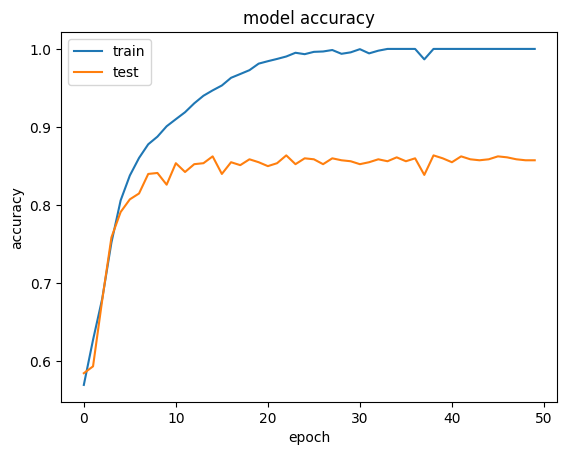

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()


plot_hist(history)

<Axes: >

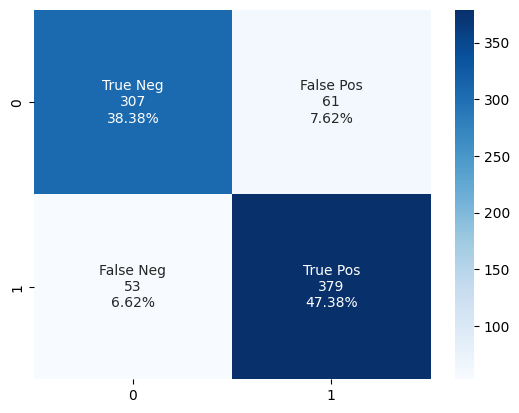

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(
    y_val,
    pred_labels
)

import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
model.save('model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Complex Model (Final)

In [56]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='elu', padding='same', input_shape=(64, 64, 3)))
model3.add(layers.BatchNormalization(synchronized=True))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='elu', padding='same'))
model3.add(layers.BatchNormalization(synchronized=True))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='elu', padding='same'))
model3.add(layers.BatchNormalization(synchronized=True))

model3.add(layers.Conv2D(64, (3, 3), activation='elu', padding='same'))
model3.add(layers.BatchNormalization(synchronized=True))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='elu', padding='same'))
model3.add(layers.BatchNormalization(synchronized=True))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Dropout(0.1))

model3.add(layers.Flatten())

model3.add(layers.Dense(64,activation= 'elu'))
model3.add(layers.BatchNormalization(synchronized=True))


model3.add(layers.Dense(1, activation= 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate= 5e-3)

model3.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [ ]:
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_26 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_110 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_27 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                     

In [57]:
history = model3.fit(X_train, y_train, epochs=40, validation_data= (X_val, y_val), batch_size=32)

Epoch 1/40
400/400 [==============================] - 54s 15ms/step - loss: 0.6602 - accuracy: 0.6184 - val_loss: 0.6358 - val_accuracy: 0.6450
Epoch 2/40
400/400 [==============================] - 5s 13ms/step - loss: 0.4487 - accuracy: 0.7801 - val_loss: 0.3772 - val_accuracy: 0.8263
Epoch 3/40
400/400 [==============================] - 6s 14ms/step - loss: 0.2646 - accuracy: 0.8888 - val_loss: 0.4799 - val_accuracy: 0.7575
Epoch 4/40
400/400 [==============================] - 6s 14ms/step - loss: 0.1819 - accuracy: 0.9278 - val_loss: 0.5787 - val_accuracy: 0.6950
Epoch 5/40
400/400 [==============================] - 5s 14ms/step - loss: 0.1333 - accuracy: 0.9477 - val_loss: 0.3740 - val_accuracy: 0.8625
Epoch 6/40
400/400 [==============================] - 6s 14ms/step - loss: 0.0937 - accuracy: 0.9645 - val_loss: 0.3947 - val_accuracy: 0.8650
Epoch 7/40
400/400 [==============================] - 5s 14ms/step - loss: 0.0707 - accuracy: 0.9735 - val_loss: 0.3094 - val_accuracy: 0.887

In [63]:
preds  = model3.predict(X_val)
pred_labels=[]

for pred in preds:
  if pred > 0.5: #change threshold to the optimal_threshold after calculating the ROC curve below
    pred_labels.append(1)
  else:
    pred_labels.append(0)

print(np.sum(pred_labels == y_val)/len(pred_labels))

25/25 [==============================] - 0s 9ms/step
0.8825


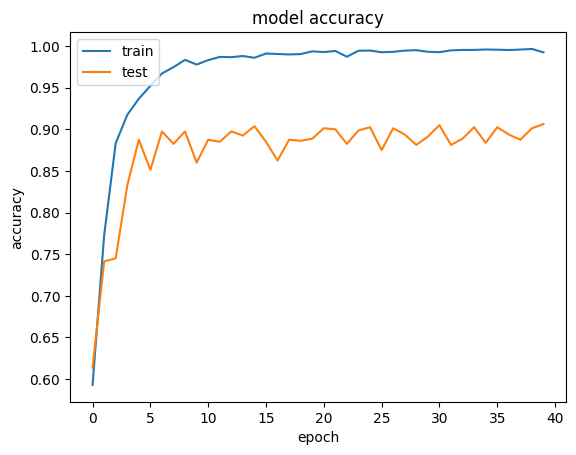

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()


plot_hist(history)

<Axes: >

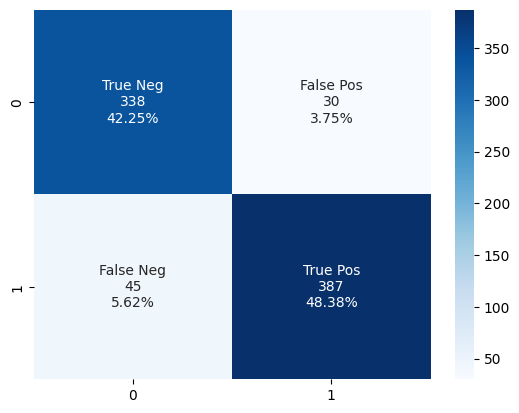

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(
    y_val,
    pred_labels
)

import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# ROC Curve and Threshold Analysis

25/25 [==============================] - 0s 5ms/step
AUC Score 0.9416537237906761
Threshold value is: 0.47548193


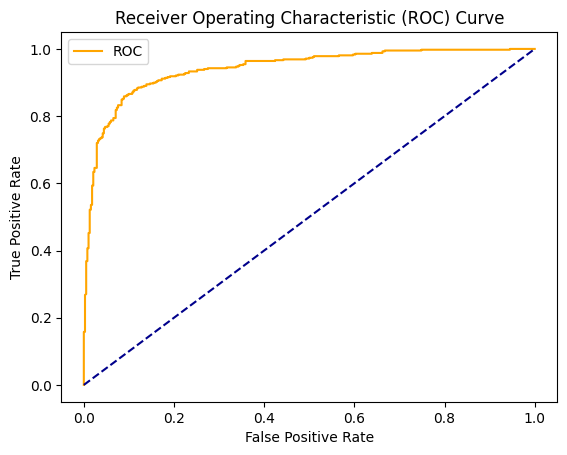

In [58]:
from sklearn import metrics
preds= model3.predict(X_val)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = metrics.roc_curve(y_val, preds)
# print(tpr)
# print(fpr)
# print(thresholds)
print("AUC Score" ,metrics.roc_auc_score(y_val, preds))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [59]:
model3.save('model3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
